## گام یکم: تبدیل داده ها به دیتافریم

In [1]:
import pandas as pd

samples = pd.read_csv('data/rocksamples.csv')

## گام دوم: پاکسازی داده ها

In [2]:
# مرحله اول: تماشای داده ها - توصیف
samples.info()
samples.head(10)
samples.tail()
samples.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


,ID,Weight (g),Pristine (%)
count,2229.000000,2229.000000,2229.000000
mean,52058.432032,168.253024,84.512764
std,26207.651471,637.286458,22.057299
min,10001.000000,0.000000,0.000000
25%,15437.000000,3.000000,80.010000
50%,65527.000000,10.200000,92.300000
75%,72142.000000,93.490000,98.140000
max,79537.000000,11729.000000,180.000000


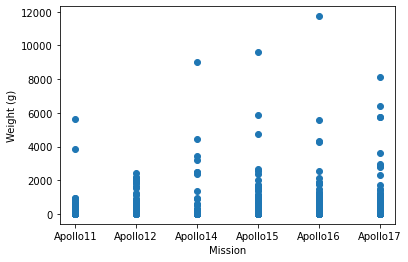

In [3]:
# مرحله اول: تماشای داده ها - نمودار
#بر پایه متپلات لایب
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(samples['Mission'], samples['Weight (g)'])
ax.set_xlabel('Mission')
ax.set_ylabel('Weight (g)')
plt.show()

<AxesSubplot:xlabel='Pristine (%)', ylabel='Weight (g)'>

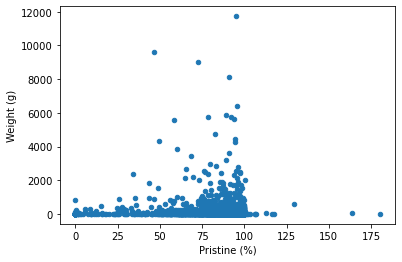

In [4]:
# بر پایه ای.پی.آی پانداز
samples.plot(kind='scatter', x='Pristine (%)', y='Weight (g)')

In [5]:
# پیش از مرحله بعدی یک کپی از دیتافریم بگیرید
samples_m = samples.copy()

In [6]:
# مرحله دوم: برخورد با داده های تهی و سطرهای تکراری
# جایگزینی سلول های تهی با یک مقدار معین
mean = samples_m['Weight (g)'].mean()
median = samples_m['Weight (g)'].median()
mode = samples_m['Weight (g)'].mode()[0]
samples_m['Weight (g)'].fillna(mean, inplace=True) # or use 'median'/'mode'
# حذف سطرهای حاوی حتی یک سلول تهی
samples_m.dropna(inplace=True)
# حذف سطرهای تکراری
print(samples_m.duplicated())
samples_m.drop_duplicates(inplace=True)
samples_m.info()

0       False
1       False
2       False
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Length: 2226, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2226 non-null   int64  
 1   Mission       2226 non-null   object 
 2   Type          2226 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2226 non-null   float64
 5   Pristine (%)  2226 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 121.7+ KB


In [7]:
# مرحله سوم و چهارم: مناسب کردن داده ها برای تحلیل های بعدی
samples_m['Weight (g)'] = samples_m['Weight (g)'].apply(lambda x : x * 0.001)
samples_m.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56
3,10004,Apollo11,Core,Unsieved,0.0448,71.76
4,10005,Apollo11,Core,Unsieved,0.0534,40.31


In [8]:
# مرحله پنجم: اصلاح عنوان سرستون ها
samples_m.rename(columns={'Weight (g)' : 'Weight (kg)'}, inplace=True)
samples_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2226 non-null   int64  
 1   Mission       2226 non-null   object 
 2   Type          2226 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (kg)   2226 non-null   float64
 5   Pristine (%)  2226 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 121.7+ KB


<AxesSubplot:xlabel='Pristine (%)'>

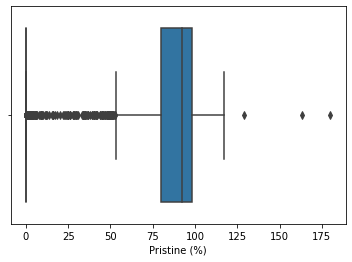

In [9]:
# مرحله ششم: داده های پرت - تشخیص
import seaborn as sb
sb.boxplot(x=samples_m['Weight (kg)'])
sb.boxplot(x=samples_m['Pristine (%)'])

In [10]:
# مرحله ششم: داده های پرت - برخورد

# حذف داده های پرت وزن
# q1_w = samples_m['Weight (kg)'].quantile(0.25)
# q3_w = samples_m['Weight (kg)'].quantile(0.75)
# iqr_w = q3_w - q1_w
# print(iqr_w)

# for i in samples_m.index:
#     if samples_m.loc[i, 'Weight (kg)'] > (q3_w + 1.5*iqr_w):
#         samples_m.drop(i,inplace=True)

# حذف داده های پرت درصد تازگی
for i in samples_m.index:
    if samples_m.loc[i, 'Pristine (%)'] > 100:
        samples_m.drop(i,inplace=True)
        
samples_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2208 non-null   int64  
 1   Mission       2208 non-null   object 
 2   Type          2208 non-null   object 
 3   Subtype       2208 non-null   object 
 4   Weight (kg)   2208 non-null   float64
 5   Pristine (%)  2208 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 185.3+ KB


## گام سوم: تحلیل داده ها

In [11]:
# ایجاد یک دیتافریم با ساختار تازه برای واریز نتایج تحلیل
missions = pd.DataFrame()
missions

""


In [12]:
# استخراج دسته ها از ستون
missions['Mission'] = samples_m['Mission'].unique()
missions

,Mission
0,Apollo11
1,Apollo12
2,Apollo14
3,Apollo15
4,Apollo16
5,Apollo17


In [13]:
# جمع داده های یک ستون بر اساس گروه داده های آن
total_samples_weight = samples_m.groupby('Mission')['Weight (kg)'].sum()
total_samples_weight

Mission
Apollo11     21.49408
Apollo12     31.82968
Apollo14     41.24569
Apollo15     74.95400
Apollo16     92.46112
Apollo17    109.31729
Name: Weight (kg), dtype: float64

In [14]:
# ادغام یک سری در یک دیتافریم
missions = pd.merge(missions, total_samples_weight, on='Mission')
missions.rename(columns={'Weight (kg)':'Sample weight (kg)'}, inplace=True)
missions

,Mission,Sample weight (kg)
0,Apollo11,21.49408
1,Apollo12,31.82968
2,Apollo14,41.24569
3,Apollo15,74.95400
4,Apollo16,92.46112
5,Apollo17,109.31729


In [15]:
# تفاضل داده ها در یک ستون
missions['Weight diff'] = missions['Sample weight (kg)'].diff()
missions['Weight diff'] = missions['Weight diff'].fillna(value=0)
missions

,Mission,Sample weight (kg),Weight diff
0,Apollo11,21.49408,0.00000
1,Apollo12,31.82968,10.33560
2,Apollo14,41.24569,9.41601
3,Apollo15,74.95400,33.70831
4,Apollo16,92.46112,17.50712
5,Apollo17,109.31729,16.85617


In [16]:
# افزودن ستون (سری) به دیتافریم موجود
missions['Lunar module (LM)'] = ['Eagle (LM-5)', 'Intrepid (LM-6)', 'Antares (LM-8)', 'Falcon (LM-10)', 'Orion (LM-11)', 'Challenger (LM-12)']
missions['LM mass (kg)'] = [15103, 15235, 15264, 16430, 16445, 16456]
missions['LM mass diff'] = missions['LM mass (kg)'].diff()
missions['LM mass diff'] = missions['LM mass diff'].fillna(value=0)

missions['Command module (CM)'] = ['Columbia (CSM-107)', 'Yankee Clipper (CM-108)', 'Kitty Hawk (CM-110)', 'Endeavor (CM-112)', 'Casper (CM-113)', 'America (CM-114)']
missions['CM mass (kg)'] = [5560, 5609, 5758, 5875, 5840, 5960]
missions['CM mass diff'] = missions['CM mass (kg)'].diff()
missions['CM mass diff'] = missions['CM mass diff'].fillna(value=0)

missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command module (CM),CM mass (kg),CM mass diff
0,Apollo11,21.49408,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107),5560,0.0
1,Apollo12,31.82968,10.33560,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-108),5609,49.0
2,Apollo14,41.24569,9.41601,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0
3,Apollo15,74.95400,33.70831,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0
4,Apollo16,92.46112,17.50712,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0
5,Apollo17,109.31729,16.85617,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0


In [17]:
# جمع داده های ستون ها در دیتافریم
missions['Total weight (kg)'] = missions['LM mass (kg)'] + missions['CM mass (kg)']
missions['Total weight diff'] = missions['LM mass diff'] + missions['CM mass diff']
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command module (CM),CM mass (kg),CM mass diff,Total weight (kg),Total weight diff
0,Apollo11,21.49408,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107),5560,0.0,20663,0.0
1,Apollo12,31.82968,10.33560,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-108),5609,49.0,20844,181.0
2,Apollo14,41.24569,9.41601,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0
3,Apollo15,74.95400,33.70831,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0
4,Apollo16,92.46112,17.50712,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0
5,Apollo17,109.31729,16.85617,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0


In [18]:
# محاسبه نسبت های وزنی - شاخصی برای پیش بینی ها
saturnVPayload = 43500
missions['Crewed area : Payload'] = missions['Total weight (kg)'] / saturnVPayload
missions['Sample : Crewed area'] = missions['Sample weight (kg)'] / missions['Total weight (kg)']
missions['Sample : Payload'] = missions['Sample weight (kg)'] / saturnVPayload
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command module (CM),CM mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload,Sample : Crewed area,Sample : Payload
0,Apollo11,21.49408,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107),5560,0.0,20663,0.0,0.475011,0.001040,0.000494
1,Apollo12,31.82968,10.33560,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-108),5609,49.0,20844,181.0,0.479172,0.001527,0.000732
2,Apollo14,41.24569,9.41601,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001962,0.000948
3,Apollo15,74.95400,33.70831,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003360,0.001723
4,Apollo16,92.46112,17.50712,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149,0.002126
5,Apollo17,109.31729,16.85617,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004877,0.002513


In [19]:
# محاسبه میانگین نسبت ها __ یک شاخص متعادل
crewedArea_payload_ratio = missions['Crewed area : Payload'].mean()
sample_crewedArea_ratio = missions['Sample : Crewed area'].mean()
sample_payload_ratio = missions['Sample : Payload'].mean()
print(crewedArea_payload_ratio)
print(sample_crewedArea_ratio)
print(sample_payload_ratio)

0.4963026819923371
0.002819247186872155
0.0014226124904214562


## گام چهارم: تفسیر و پیش بینی

In [20]:
# ایجاد دیتافریم جدید برای ثبت ننتایج پیش بینی
artemis_mission = pd.DataFrame({'Mission':['artemis1', 'artemis1b', 'artemis2'], 'Payload (kg)': [26988, 37965, 42955]})
artemis_mission['Total weight (kg)'] = artemis_mission['Payload (kg)'] * crewedArea_payload_ratio
artemis_mission

,Mission,Payload (kg),Total weight (kg)
0,artemis1,26988,13394.216782
1,artemis1b,37965,18842.131322
2,artemis2,42955,21318.681705


In [21]:
# تفسیر وزن نمونه برداری از روی داده های جدید
artemis_mission['Sample weight from total (kg)'] = artemis_mission['Total weight (kg)'] * sample_crewedArea_ratio
artemis_mission['Sample weight from payload (kg)'] = artemis_mission['Payload (kg)'] * sample_payload_ratio
artemis_mission

,Mission,Payload (kg),Total weight (kg),Sample weight from total (kg),Sample weight from payload (kg)
0,artemis1,26988,13394.216782,37.761608,38.393466
1,artemis1b,37965,18842.131322,53.120626,54.009483
2,artemis2,42955,21318.681705,60.102633,61.108320


In [22]:
# پیش بینی وزن نمونه برداری با میانگین گیری از نتایج تفسیر
artemis_mission['Estimated sample weight (kg)'] = (artemis_mission['Sample weight from total (kg)'] + artemis_mission['Sample weight from payload (kg)']) / 2
artemis_mission

,Mission,Payload (kg),Total weight (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26988,13394.216782,37.761608,38.393466,38.077537
1,artemis1b,37965,18842.131322,53.120626,54.009483,53.565054
2,artemis2,42955,21318.681705,60.102633,61.108320,60.605476


In [23]:
# تفسیر اولویت نمونه برداری
samples_m['Remaining (kg)'] = samples_m['Weight (kg)'] * (samples_m['Pristine (%)'] * 0.01)
samples_m.describe()

,ID,Weight (kg),Pristine (%),Remaining (kg)
count,2208.000000,2208.000000,2208.000000,2208.000000
mean,52295.559783,0.168162,84.313465,0.137689
std,26118.027174,0.638858,21.833291,0.526621
min,10001.000000,0.000000,0.000000,0.000000
25%,15467.750000,0.003027,80.000000,0.002450
50%,65538.500000,0.010215,92.150000,0.008565
75%,72151.250000,0.093423,98.042500,0.077061
max,79537.000000,11.729000,100.000000,11.169527


In [24]:
# تعریف دیتافریمی از نمونه های بحرانی
samples_critical = samples_m.loc[(samples_m['Weight (kg)'] <= 0.168) & (samples_m['Remaining (kg)'] <= 0.137)]
samples_critical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1772 non-null   int64  
 1   Mission         1772 non-null   object 
 2   Type            1772 non-null   object 
 3   Subtype         1772 non-null   object 
 4   Weight (kg)     1772 non-null   float64
 5   Pristine (%)    1772 non-null   float64
 6   Remaining (kg)  1772 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 110.8+ KB


In [25]:
# محاسبه وزن نمونه های بحرانی
samples_critical.groupby('Type')['Weight (kg)'].sum()

Type
Basalt      4.75262
Breccia    12.32471
Core        1.03927
Crustal     0.48060
Soil       17.81696
Special     0.00300
Name: Weight (kg), dtype: float64

In [26]:
# پیش بینی نمونه های مورد نیاز در آرتمیس
# اگر همه نمونه های اولویت بندی شده از نظر محدودیت وزنی قابل پیشنهاد هستند.
samples_needed = samples_critical
# اگر وزن نمونه های اولویت بندی شده بیش از ظرفیت وزنی نمونه گیری آرتمیس باشد
# samples_needed = samples_critical.loc[samples_critical['Type'].isin(['Basalt', 'Breccia'])]

In [27]:
# چکیده گزارش پیش بینی وزن و نوع نمونه های مورد نیاز
samples_needed_overview = pd.DataFrame()
samples_needed_overview['Type'] = samples_critical.Type.unique()
samples_needed_weight = samples_needed.groupby('Type')['Weight (kg)'].sum().reset_index()
samples_needed_overview = pd.merge(samples_needed_overview, samples_needed_weight, on='Type')
samples_needed_overview

,Type,Weight (kg)
0,Soil,17.81696
1,Core,1.03927
2,Breccia,12.32471
3,Basalt,4.75262
4,Crustal,0.48060
5,Special,0.00300
